In [1]:
import pandas as pd
import numpy as np
import os # To set our working folder
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as mticker
import seaborn as sns
import yfinance as yf  # This gets us prices from Yahoo finance. See https://pypi.org/project/yfinance/

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

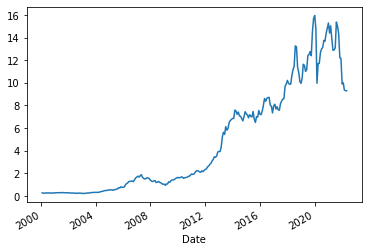

In [2]:
data = yf.download(tickers="RYM.NZ", start='2000-01-01', end='2022-04-30', interval="1mo")['Adj Close'].dropna()
data.plot()

In [3]:
rym = yf.Ticker("RYM.NZ")
rym_bs = rym.get_balance_sheet().T

In [4]:
rym.earnings

,Revenue,Earnings
Year,,
2018,342098000,388216000
2019,381802000,325986000
2020,423336000,264710000
2021,455691000,423061000


In [5]:
rym.get_earnings()

,Revenue,Earnings
Year,,
2018,342098000,388216000
2019,381802000,325986000
2020,423336000,264710000
2021,455691000,423061000


In [6]:
rym_fin = rym.quarterly_financials
rym_fin


,2021-09-30,2021-06-30,2021-03-31,2020-12-31
Research Development,None,None,None,None
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,137261500.0,137261500.0,98999000.0,98999000.0
Minority Interest,None,None,None,None
Net Income,140733500.0,140733500.0,105330000.0,105330000.0
Selling General Administrative,None,None,None,None
Gross Profit,11221000.0,11221000.0,11899000.0,11899000.0
Ebit,2294000.0,2294000.0,3545000.0,3545000.0
Operating Income,2294000.0,2294000.0,3545000.0,3545000.0
Other Operating Expenses,None,None,None,None


In [7]:
def get_info(tick):
    firm = yf.Ticker(tick)
    dfi = pd.DataFrame.from_dict(firm.info, orient="index")
    dfi.reset_index(inplace=True)
    dfi.columns = ["Attribute", tick]
    return dfi.set_index("Attribute")
    #return dfi.T
df = get_info("AIR.NZ")
df

,AIR.NZ
Attribute,
zip,1010
sector,Industrials
fullTimeEmployees,8000
longBusinessSummary,Air New Zealand Limited provides passenger and...
city,Auckland
...,...
dayHigh,0.88
regularMarketPrice,0.87
preMarketPrice,None


In [8]:
def get_bs(tick):
    firm = yf.Ticker(tick)
    dfi = firm.get_balance_sheet().T
    return dfi
dfb = get_bs("AIR.NZ")
dfb.T

,2021-06-30,2020-06-30,2019-06-30,2018-06-30
Intangible Assets,1.790000e+08,1.860000e+08,1.860000e+08,1.700000e+08
Total Liab,5.589000e+09,6.225000e+09,5.629000e+09,5.670000e+09
Total Stockholder Equity,1.105000e+09,1.318000e+09,1.992000e+09,2.176000e+09
Other Current Liab,7.670000e+08,1.085000e+09,1.541000e+09,1.444000e+09
Total Assets,6.694000e+09,7.543000e+09,7.621000e+09,7.846000e+09
Common Stock,2.197000e+09,2.197000e+09,2.206000e+09,2.216000e+09
Other Current Assets,1.420000e+08,8.100000e+07,6.800000e+07,2.090000e+08
Retained Earnings,-1.042000e+09,-7.570000e+08,-1.840000e+08,-1.030000e+08
Other Liab,8.350000e+08,9.350000e+08,6.730000e+08,6.710000e+08
Treasury Stock,-5.000000e+07,-1.220000e+08,-3.000000e+07,6.300000e+07


In [9]:
def get_pl(tick):
    firm = yf.Ticker(tick)
    dfi = firm.financials.T
    return dfi
dfb = get_pl("AIR.NZ")
dfb.T

,2021-06-30,2020-06-30,2019-06-30,2018-06-30
Research Development,None,None,None,None
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,-411000000.0,-628000000.0,382000000.0,540000000.0
Minority Interest,None,None,None,None
Net Income,-289000000.0,-454000000.0,276000000.0,390000000.0
Selling General Administrative,80000000.0,261000000.0,350000000.0,344000000.0
Gross Profit,685000000.0,1342000000.0,1522000000.0,1706000000.0
Ebit,-351000000.0,-76000000.0,328000000.0,559000000.0
Operating Income,-351000000.0,-76000000.0,328000000.0,559000000.0
Other Operating Expenses,240000000.0,316000000.0,290000000.0,278000000.0


In [10]:
def get_bs_list(nzx_set):
    tickers_data= {}
    for ticker in nzx_set:
        print(ticker)
        tickers_data[ticker] = get_bs(ticker)
    dfi = pd.concat(tickers_data).reset_index()
    dfi.rename(columns = {'level_0': 'ticker', '': 'date'}, inplace=True)
    return dfi.set_index(["ticker", 'date'])

def get_pl_list(nzx_set):
    tickers_data= {}
    for ticker in nzx_set:
        print(ticker)
        tickers_data[ticker] = get_pl(ticker)
    dfi = pd.concat(tickers_data).reset_index()
    dfi.rename(columns = {'level_0': 'ticker', '': 'date'}, inplace=True)
    return dfi.set_index(["ticker", 'date'])

In [11]:
#%% Dupont analysis for the Warehouse Group and Briscoe Group 

dfbs = get_bs_list(['WHS.NZ', 'BGP.NZ'])
dfpls = get_pl_list(['WHS.NZ', 'BGP.NZ']).apply(pd.to_numeric,  errors='coerce')

df_dup = dfbs[['Total Stockholder Equity','Common Stock', 'Total Assets', 'Total Liab', 'Total Current Assets','Total Current Liabilities']].join(dfpls[['Net Income Applicable To Common Shares','Total Revenue']])

df_dup = df_dup.assign(roe = df_dup['Net Income Applicable To Common Shares'].div(df_dup['Total Stockholder Equity']),
                       sta = df_dup['Total Revenue'].div(df_dup['Total Assets']),
                       lev = df_dup['Total Assets'].div(df_dup['Total Stockholder Equity']),
                       marg= df_dup['Net Income Applicable To Common Shares'].div(df_dup['Total Revenue']))

df_dup = df_dup.reset_index().set_index('date').groupby('ticker').resample('A-AUG')[ 'roe', 'sta', 'lev', 'marg'].sum()
df_dup

WHS.NZ
BGP.NZ
WHS.NZ
BGP.NZ


roe       sta       lev      marg
ticker date                                              
BGP.NZ 2019-08-31  0.231750  1.729617  1.335639  0.100318
       2020-08-31  0.200510  0.937505  2.231674  0.095837
       2021-08-31  0.282570  1.081366  2.505302  0.104302
       2022-08-31  0.000000  0.000000  2.300124  0.000000
WHS.NZ 2018-08-31  0.047722  2.852657  2.189689  0.007640
       2019-08-31  0.135841  2.922817  2.183234  0.021288
       2020-08-31  0.117921  1.710549  4.918321  0.014017
       2021-08-31  0.260197  1.805373  4.182915  0.034455

In [12]:
dfm = pd.melt(df_dup.reset_index(), id_vars=['ticker', 'date'], value_vars=[ 'roe', 'sta', 'lev', 'marg']).sort_values(by='date')
dfm['Date'] = dfm['date'].dt.strftime('%Y')
dfm.head()

,ticker,date,variable,value,Date
28,WHS.NZ,2018-08-31,marg,0.007640,2018
4,WHS.NZ,2018-08-31,roe,0.047722,2018
12,WHS.NZ,2018-08-31,sta,2.852657,2018
20,WHS.NZ,2018-08-31,lev,2.189689,2018
0,BGP.NZ,2019-08-31,roe,0.231750,2019


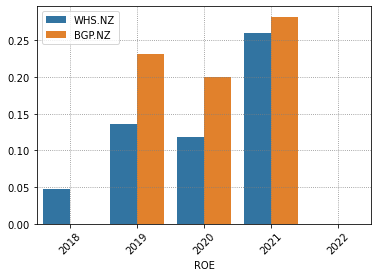

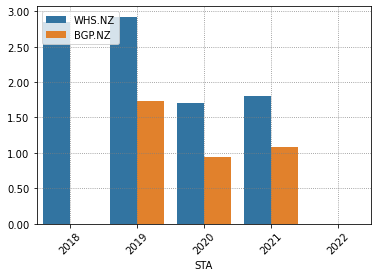

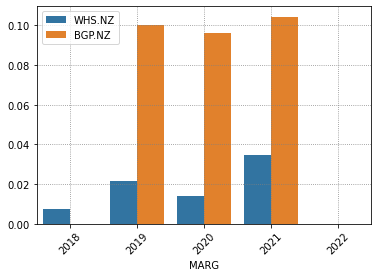

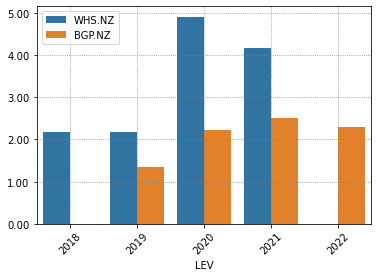

In [13]:
#%%
def plot_dupont(dfm, var):
    dfm = dfm.copy()
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(111)
    ax = sns.barplot(y = 'value', x="Date", hue = 'ticker', data = dfm.loc[dfm['variable']==var])
    ax.set_xlabel(var.upper())
    ax.set_ylabel('')
    ticks_loc = ax.get_yticks().tolist()
    ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
    ax.set_yticklabels(['{:,.2f}'.format(x) for x in ticks_loc])
    ax.tick_params('x', labelrotation=45)
    #set_xmargin(ax, left=0, right=0)
    date_form = DateFormatter("%d-%m-%Y")
    #ax.xaxis.set_major_formatter(date_form)
    plt.grid(linestyle="dotted", color='grey')
    plt.legend(loc='upper left')
    plt.show()
#%%
plot_dupont(dfm, 'roe')
plot_dupont(dfm, 'sta')
plot_dupont(dfm, 'marg')
plot_dupont(dfm, 'lev')


In [14]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from linearmodels.panel import PanelOLS
import math
from scipy.optimize import minimize
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [15]:
stocks_list = ["ANZ.NZ", 'WHS.NZ', 'BGP.NZ', '^NZ50']  # tickers seperated by space
start_date = '2000-01-01'
end_date = '2022-04-30'

data = yf.download(tickers=stocks_list, start=start_date, end=end_date, interval="1mo")['Adj Close'].dropna()

data.columns =  ['ANZ', 'BGP', 'WHS', 'NZ50']
monthly_ret = np.log(data).diff().dropna()

[*********************100%***********************]  4 of 4 completed


<AxesSubplot:xlabel='Date'>

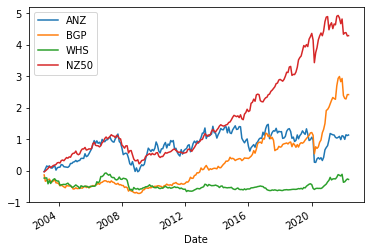

In [16]:
monthly_ret.add(1).cumprod().sub(1).plot()